In [ ]:
'''5. Usando as bibliotecas Pandas e MatPlotLib e um dataset (podes selecionar das aulas, fazer 
download na plataforma kaggle ou escolher um dataset pessoal), elabora um notebook 
jupyter no qual efetues: 
• Limpeza e tratamento de dados; 
• Processamento de dados: groupby, filter, criação de novas colunas,…; 
• Visualização de dados; 
    alínea          Cotação (escala 1-20) 
        1                       3 
        2                       4 
        3                       4 
        4                       4 
        5                       5 '''




'5. Usando as bibliotecas Pandas e MatPlotLib e um dataset (podes selecionar das aulas, fazer \ndownload na plataforma kaggle ou escolher um dataset pessoal), elabora um notebook \njupyter no qual efetues: \n• Limpeza e tratamento de dados; \n• Processamento de dados: groupby, filter, criação de novas colunas,…; \n• Visualização de dados; \n    alínea          Cotação (escala 1-20) \n        1                       3 \n        2                       4 \n        3                       4 \n        4                       4 \n        5                       5 '

In [ ]:

import pandas as pd
import pylab as plt


In [2]:
#Lê os dados
df_train = pd.read_csv("flights_small.csv")
#Imprime as 5 primeiras linhas
print(df_train.head())
#Imprime as 5 últimas linhas
print(df_train.tail())

   Unnamed: 0  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER  \
0           0  2015      1    1            4      AS             98   
1           1  2015      1    1            4      AA           2336   
2           2  2015      1    1            4      US            840   
3           3  2015      1    1            4      AA            258   
4           4  2015      1    1            4      AS            135   

  TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  ...  ARRIVAL_TIME  \
0      N407AS            ANC                 SEA  ...         408.0   
1      N3KUAA            LAX                 PBI  ...         741.0   
2      N171US            SFO                 CLT  ...         811.0   
3      N3HYAA            LAX                 MIA  ...         756.0   
4      N527AS            SEA                 ANC  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                  NaN        

In [3]:
#Vê o tipo de dados de cada coluna
print(df_train.dtypes)

Unnamed: 0               int64
YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: o

In [4]:
# O tipo 'object' é uma string para pandas que apresenta problemas com algoritmos de aprendizado de máquina
# Se quisermos usá-los como recursos, precisaremos convertê-los em representações numéricas.
#Obtenha algumas informações básicas sobre o DataFrame:

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   YEAR                 1000 non-null   int64  
 2   MONTH                1000 non-null   int64  
 3   DAY                  1000 non-null   int64  
 4   DAY_OF_WEEK          1000 non-null   int64  
 5   AIRLINE              1000 non-null   object 
 6   FLIGHT_NUMBER        1000 non-null   int64  
 7   TAIL_NUMBER          998 non-null    object 
 8   ORIGIN_AIRPORT       1000 non-null   object 
 9   DESTINATION_AIRPORT  1000 non-null   object 
 10  SCHEDULED_DEPARTURE  1000 non-null   int64  
 11  DEPARTURE_TIME       916 non-null    float64
 12  DEPARTURE_DELAY      916 non-null    float64
 13  TAXI_OUT             916 non-null    float64
 14  WHEELS_OFF           916 non-null    float64
 15  SCHEDULED_TIME       1000 non-null   fl

In [5]:
#Podemos ver que TAIL_NUMBER, DEPARTURE_TIME, DEPARTURE_DELAY,TAXI_OUT,
# WHEELS_OFF,ELAPSED_TIME,AIR_TIME,WHEELS_ON, TAXI_IN,ARRIVAL_TIME,
# ARRIVAL_DELAY,AIR_SYSTEM_DELAY, SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,
# e EATHER_DELAY têm valores ausentes, CANCELLATION_REASON tem muitos valores ausentes.

#Agora vamos gerar várias estatísticas descritivas no DataFrame:

print(df_train.describe())

        Unnamed: 0    YEAR   MONTH     DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
count  1000.000000  1000.0  1000.0  1000.0       1000.0    1000.000000   
mean    499.500000  2015.0     1.0     1.0          4.0    2045.809000   
std     288.819436     0.0     0.0     0.0          0.0    1904.369595   
min       0.000000  2015.0     1.0     1.0          4.0       9.000000   
25%     249.750000  2015.0     1.0     1.0          4.0     601.750000   
50%     499.500000  2015.0     1.0     1.0          4.0    1302.500000   
75%     749.250000  2015.0     1.0     1.0          4.0    2967.750000   
max     999.000000  2015.0     1.0     1.0          4.0    7423.000000   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY    TAXI_OUT  ...  \
count          1000.000000      916.000000       916.000000  916.000000  ...   
mean            597.307000      596.631004         3.969432   16.830786  ...   
std             124.772509      146.448414        28.180743    7.826728  ...   
min          

In [6]:
#Vamos agora tratar os nulos

##Lista as colunas e marca as que possuem algum valor nulo
print(df_train.isnull().any())
print()

Unnamed: 0             False
YEAR                   False
MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME         False
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON     True
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool



In [7]:
# Na informação básica da dataframe, podemos ver o número de valores não nulos de cada coluna.

print(df_train.info)

<bound method DataFrame.info of      Unnamed: 0  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER  \
0             0  2015      1    1            4      AS             98   
1             1  2015      1    1            4      AA           2336   
2             2  2015      1    1            4      US            840   
3             3  2015      1    1            4      AA            258   
4             4  2015      1    1            4      AS            135   
..          ...   ...    ...  ...          ...     ...            ...   
995         995  2015      1    1            4      WN            552   
996         996  2015      1    1            4      WN           3239   
997         997  2015      1    1            4      WN           1912   
998         998  2015      1    1            4      UA           1660   
999         999  2015      1    1            4      US            445   

    TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  ...  ARRIVAL_TIME  \
0        N407AS   

In [8]:
# vamos simplesmente remover a coluna de nossos dados.
#Obs. essa á a opção apenas para exercitar as possibilidades de forma didática.
# Vários algoritmos podem beneficiar da informação da cabine, mesmo com poucos exemplos.
## Cria um novo dataframe (df_flights_small_2) sem a coluna Cabin
df_train2 = df_train.drop("CANCELLATION_REASON", axis=1)
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   YEAR                 1000 non-null   int64  
 2   MONTH                1000 non-null   int64  
 3   DAY                  1000 non-null   int64  
 4   DAY_OF_WEEK          1000 non-null   int64  
 5   AIRLINE              1000 non-null   object 
 6   FLIGHT_NUMBER        1000 non-null   int64  
 7   TAIL_NUMBER          998 non-null    object 
 8   ORIGIN_AIRPORT       1000 non-null   object 
 9   DESTINATION_AIRPORT  1000 non-null   object 
 10  SCHEDULED_DEPARTURE  1000 non-null   int64  
 11  DEPARTURE_TIME       916 non-null    float64
 12  DEPARTURE_DELAY      916 non-null    float64
 13  TAXI_OUT             916 non-null    float64
 14  WHEELS_OFF           916 non-null    float64
 15  SCHEDULED_TIME       1000 non-null   fl

128.79781420765028
120.0


NameError: name 'plt' is not defined

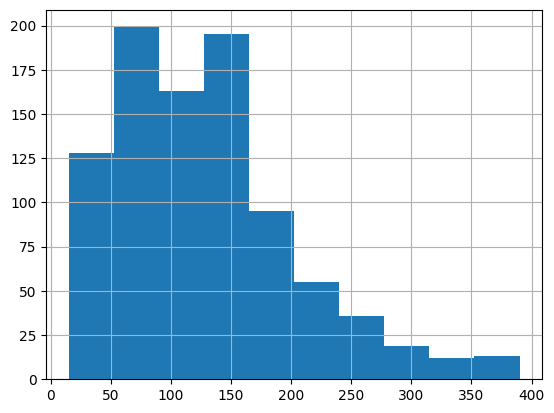

In [10]:
#Agora vamos analisar a coluna AIR_TIME. Temos duas opções:

#Trocar nulo por um valor (média ou mediana)
#Ignorar
# A segunda opção limita o uso de alguns algoritmos, mas a primeira também tem os seus problemas.
# Vamos analisar a primeira opção e para isso vamos calcular a média e a mediana das idades
# e ver o histograma dos dados originais.

media_idade = df_train["AIR_TIME"].mean()
mediana_idade = df_train["AIR_TIME"].median()

print(media_idade)
print(mediana_idade)

df_train["AIR_TIME"].hist()
plt.title("Tempo_Voo")
plt.show()

C:\Users\barbo\AppData\Local\Temp\ipykernel_27148\316995798.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train2["AIR_TIME"].fillna(media_idade, inplace=True) ## O inplace altera no próprio dataframe em vez de termos de criar outro


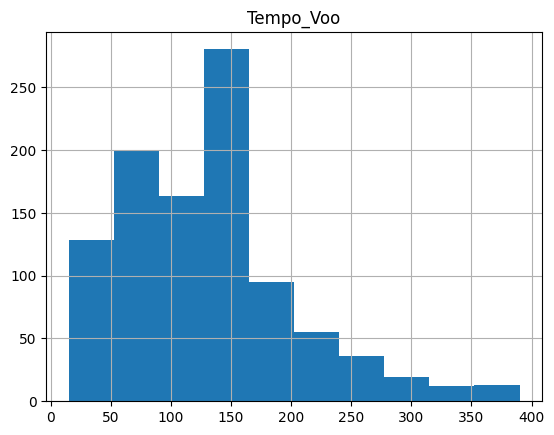

In [ ]:
# Como a média e mediana são muito próximos, a diferença será mínima. Então, vamos 
# trocar os nulos pela média e depois gerar novo histograma de idades.

## preenche os nulos com a média dos voos
df_train2["AIR_TIME"].fillna(media_idade, inplace=True) ## O inplace altera no próprio dataframe em vez de termos de criar outro
df_train2["AIR_TIME"].hist()
plt.title("Tempo_Voo")
plt.show()

In [ ]:
#Como podemos ver, o formato do histograma modifica-se completamente, 
# mas essa será nossa opção para essa coluna.
# Por último vamos analisar a coluna TAXI_OUT, que tem é um de muitas com poucos calores nulos. 
# Vamos gerar um histograma:
print(df_train2.groupby("TAXI_OUT")["DESTINATION_AIRPORT"].count()) #group by porto de 
#embarque - número de passageiros por porto de embarque

TAXI_OUT
3.0      2
4.0      1
6.0      3
7.0      9
8.0     12
9.0     56
10.0    75
11.0    68
12.0    95
13.0    79
14.0    53
15.0    62
16.0    51
17.0    47
18.0    35
19.0    30
20.0    17
21.0    29
22.0    18
23.0    17
24.0    16
25.0    16
26.0    11
27.0    16
28.0     6
29.0    16
30.0    13
31.0    12
32.0     9
33.0    10
34.0     1
35.0     3
36.0     6
37.0     6
38.0     1
39.0     1
40.0     2
41.0     1
42.0     2
43.0     1
45.0     1
46.0     1
48.0     2
56.0     2
61.0     1
62.0     1
Name: DESTINATION_AIRPORT, dtype: int64


In [ ]:
#Como podemos ver nos dados resultantes, a maioria dos passageiros demoraram 12 minutos a apanhar um taxi,
# então vamos, nesse caso, atribuir os valores em falta para o valor mais comum:
df_train2["TAXI_OUT"].fillna("12.0", inplace=True)
print(df_train2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   YEAR                 1000 non-null   int64  
 2   MONTH                1000 non-null   int64  
 3   DAY                  1000 non-null   int64  
 4   DAY_OF_WEEK          1000 non-null   int64  
 5   AIRLINE              1000 non-null   object 
 6   FLIGHT_NUMBER        1000 non-null   int64  
 7   TAIL_NUMBER          998 non-null    object 
 8   ORIGIN_AIRPORT       1000 non-null   object 
 9   DESTINATION_AIRPORT  1000 non-null   object 
 10  SCHEDULED_DEPARTURE  1000 non-null   int64  
 11  DEPARTURE_TIME       916 non-null    float64
 12  DEPARTURE_DELAY      916 non-null    float64
 13  TAXI_OUT             1000 non-null   object 
 14  WHEELS_OFF           916 non-null    float64
 15  SCHEDULED_TIME       1000 non-null   fl

C:\Users\barbo\AppData\Local\Temp\ipykernel_27148\254892673.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train2["TAXI_OUT"].fillna("12.0", inplace=True)
C:\Users\barbo\AppData\Local\Temp\ipykernel_27148\254892673.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train2["TAXI_OUT"].fillna("12.0", inplace=True)


In [ ]:
#Após aplicar o metod de analise anterior para os restantes valores com poucos falsos
#restar-nos-ia salvar os dados.

df_train2.to_csv("flights_small_less_nulls.csv", index=False)